# Feature Selection
- `SelectKbest`로 최상의 Features들을 지정해본다.
- `CrossValidation`을 통해 일반화될 가능성을 생각해본다.
<aside>

### **💡 4) 머신러닝 방식 적용 및 교차검증**

데이터의 탐색과 전처리 작업이 끝났다면 **모델링을 통해 베이스라인과의 성능 비교**를 해봅니다.

- Linear / Tree-based / Ensemble 모델을 학습하세요. (다양하게 시도해보시는 걸 추천합니다.)
- 평가지표를 계산 후 베이스라인과 비교해보세요.
- 어느정도 성능이 나왔다면, 교차 검증 (이하 CV)을 통해서 일반화될 가능성이 있는지 확인해봅니다.
- 모델 성능을 개선하기 위한 다양한 방법을 적용해보세요.
    - Hyperparameter tuning, etc.
- 최소 2개 이상의 모델을 만들어서 validation 점수를 보고하세요.
- 최종 모델의 test 점수를 보고하세요.

### **태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.**

1. 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
2. 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
3. 최종 모델에 관해 설명하세요.
</aside>

# Classifier Feature Selection (분류 특성 선택)

In [9]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 전체 컬럼 출력하기
pd.set_option('display.max_columns', None)

warnings.filterwarnings("ignore")

df4 = pd.read_csv('../data/cls_data_4p.csv')
df11 = pd.read_csv('../data/cls_data_11p.csv')

### 데이터 전처리

In [10]:
from sklearn.model_selection import train_test_split 

target = 'position'
train, test = train_test_split(df11, random_state=2, train_size=.75, stratify=df11[target])
train, val = train_test_split(train, random_state=2, train_size=.75, stratify=train[target])
train.shape, val.shape, test.shape

((10656, 103), (3552, 103), (4736, 103))

In [11]:
features = train.columns.drop(target)
# X (features)
X_train = train[features] 
X_val = val[features]
X_test = test[features]

# y (target)
y_train = train[target]
y_val = val[target] 
y_test = test[target]

In [60]:
# 파이프라인 #
from sklearn.pipeline import make_pipeline, Pipeline

# 인코더 #
from category_encoders import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# 모델링 #
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# 평가 #
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

### Make Pipeline

In [16]:
pipe = Pipeline([
        ('encoder', OneHotEncoder(cols=['preferred_foot','body_type'], use_cat_names=True)),
])

pipe_train_enc = pipe.fit_transform(X_train)
pipe_val_enc = pipe.transform(X_val)

### SelectKBest

In [17]:
selector = SelectKBest(score_func=f_classif, k=90)

X_train_selected = selector.fit_transform(pipe_train_enc, y_train) 
X_val_selected = selector.transform(pipe_val_enc)

In [21]:
features_names = pipe_train_enc.columns 

selected_filter = selector.get_support()

selected_names = features_names[selected_filter]
# print(selected_names)

features_scores = pd.DataFrame(selector.scores_,features_names)

In [28]:
features_scores.sort_values(by=0,ascending=False).head(25)

,0
goalkeeping_diving,20931.730795
goalkeeping_reflexes,20762.864494
goalkeeping_handling,20277.565661
goalkeeping_kicking,17621.762063
goalkeeping_positioning,17374.121365
dribbling,7595.440543
physic,5971.179347
pace,5748.791332
passing,5356.281911
shooting,4549.701274


In [29]:
features_scores.sort_values(by=0,ascending=True).head(20)

,0
body_type_Unique,1.821248
body_type_Stocky,3.831308
LB_grow,9.266375
RB_grow,9.266375
body_type_Normal,19.817373
LWB_grow,23.318225
RWB_grow,23.318225
body_type_Lean,24.303885
age,26.811771
movement_reactions,28.141654


In [37]:
selector = SelectKBest(score_func=f_classif, k=80)

pipe = make_pipeline(
    OneHotEncoder(cols=['preferred_foot','body_type'], use_cat_names=True),
    SelectKBest(score_func=f_classif, k=65)
    # MinMaxScaler()
)
X_train_transform = pipe.fit_transform(X_train, y_train)
X_val_transform = pipe.transform(X_val)

                 precision    recall  f1-score   support

 central_attack       0.71      0.94      0.81       430
central_defence       0.58      0.80      0.68       356
 central_middle       0.52      0.72      0.60       466
 defence_middle       0.44      0.55      0.49       188
     goalkeeper       1.00      1.00      1.00       391
    left_attack       0.23      0.06      0.09       124
   left_defence       0.45      0.44      0.45       408
    left_middle       0.26      0.21      0.23       334
   right_attack       0.11      0.02      0.03       130
  right_defence       0.42      0.32      0.36       397
   right_middle       0.27      0.17      0.21       328

       accuracy                           0.55      3552
      macro avg       0.45      0.47      0.45      3552
   weighted avg       0.51      0.55      0.52      3552



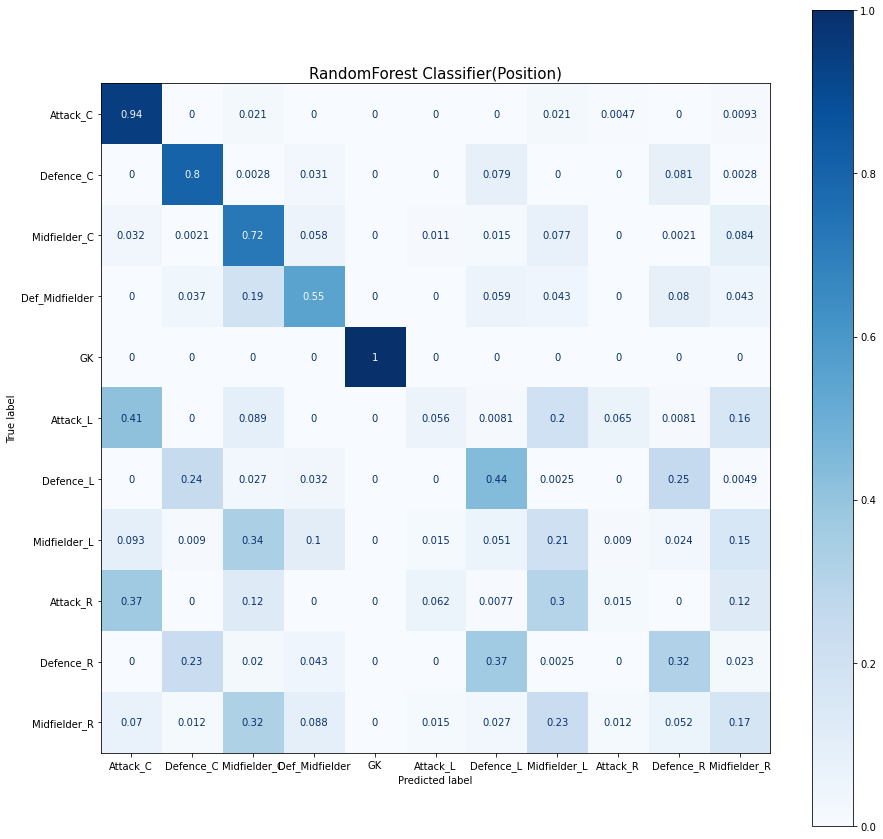

In [38]:
clf = RandomForestClassifier()
clf.fit(X_train_transform, y_train)
y_pred = clf.predict(X_val_transform)
print(classification_report(y_val, y_pred))

label = ['Attack_C', 'Defence_C', 'Midfielder_C', 'Def_Midfielder', 'GK',
         'Attack_L', 'Defence_L', 'Midfielder_L', 'Attack_R', 'Defence_R', 'Midfielder_R']
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf, 
                              X_val_transform, y_val,
                              display_labels = label,
                              cmap = 'Blues',
                              normalize='true',
                              ax = ax)
plt.title('RandomForest Classifier(Position)', fontsize=15);

별 의미가 없음

### CrossValidation

In [30]:
from sklearn.model_selection import cross_val_score

In [33]:
target = 'position'
train, test = train_test_split(df11, random_state=2, train_size=.75, stratify=df11[target])
train.shape, test.shape

pipe = Pipeline([
        ('encoder', OneHotEncoder(cols=['preferred_foot','body_type'], use_cat_names=True)),
])

pipe_train_enc = pipe.fit_transform(X_train)
train_features_transform = pipe_train_enc.columns
pipe_test_enc = pipe.transform(X_test)

In [39]:
pipe = make_pipeline(
    OneHotEncoder(cols=['preferred_foot','body_type'], use_cat_names=True),
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    RandomForestClassifier()
    # MinMaxScaler()
)

k = 20
scores = cross_val_score(pipe, X_train, y_train, cv = k,
                         scoring='accuracy')

print(f'Accuracy ({k} folds):', scores)

Accuracy (20 folds): [0.62851782 0.61538462 0.63227017 0.64540338 0.63414634 0.62101313
 0.62288931 0.61726079 0.62476548 0.60412758 0.64165103 0.62288931
 0.61726079 0.62101313 0.64165103 0.62664165 0.62406015 0.64661654
 0.61090226 0.62781955]


교차 검증 결과, 기존 RandomForest에서의 결과(0.62)와 큰 차이가 없는 결과가 나왔음. 

# Regression Feature Selection (회귀 특성 선택)

In [43]:
df = pd.read_csv('../data/reg_data.csv')
df.drop(columns=['position'], axis=1, inplace=True)

In [44]:
from sklearn.model_selection import train_test_split 

target = 'value_eur'
train, test = train_test_split(df, random_state=2, train_size=.75)
train, val = train_test_split(train, random_state=2, train_size=.75)
train.shape, val.shape, test.shape

((10656, 105), (3552, 105), (4736, 105))

In [45]:
features = train.columns.drop(target)
# X (features)
X_train = train[features] 
X_val = val[features]
X_test = test[features]

# y (target)
y_train = train[target]
y_val = val[target] 
y_test = test[target]

In [46]:
pipe = Pipeline([
        ('encoder', OneHotEncoder(cols=['preferred_foot','body_type'], use_cat_names=True)),
])

pipe_train_enc = pipe.fit_transform(X_train)
pipe_val_enc = pipe.transform(X_val)

In [47]:
selector = SelectKBest(score_func=f_classif, k=90)

X_train_selected = selector.fit_transform(pipe_train_enc, y_train) 
X_val_selected = selector.transform(pipe_val_enc)

In [48]:
features_names = pipe_train_enc.columns 

selected_filter = selector.get_support()

selected_names = features_names[selected_filter]
# print(selected_names)

features_scores = pd.DataFrame(selector.scores_,features_names)

In [49]:
features_scores.sort_values(by=0,ascending=False).head(25)

,0
overall,490.373259
wage_eur,191.384547
body_type_Unique,113.043411
movement_reactions,107.802305
mentality_composure,48.200870
international_reputation,32.918237
LCM_value,29.019634
RCM_value,29.019634
CM_value,29.019634
power_shot_power,26.605623


In [50]:
features_scores.sort_values(by=0,ascending=True).head(25)

,0
body_type_Normal,1.191338
height_cm,1.245694
body_type_Stocky,1.321321
body_type_Lean,1.340600
preferred_foot_Right,1.364786
preferred_foot_Left,1.364786
work_rate_defensive,1.684859
weight_kg,1.743956
goalkeeping_diving,2.839959
goalkeeping_positioning,2.874303


In [53]:
pipe = make_pipeline(
    OneHotEncoder(cols=['preferred_foot','body_type'], use_cat_names=True),
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    SelectKBest(score_func=f_regression, k=65),
    MinMaxScaler()
)
X_train_transform = pipe.fit_transform(X_train, y_train)
X_val_transform = pipe.transform(X_val)

In [61]:
reg = RandomForestRegressor()
reg.fit(X_train_transform, y_train)
y_pred = reg.predict(X_val_transform)

print(f"MAE : {mean_absolute_error(y_val, y_pred)}")
print(f"RMSE : {mean_squared_error(y_val, y_pred)**0.5}")
print(f"R2Score : {r2_score(y_val, y_pred)}")

MAE : 249850.87274774775
RMSE : 1207724.6562172517
R2Score : 0.9528706583753189


### CrossValidation

In [62]:
pipe = Pipeline([
        ('encoder', OneHotEncoder(cols=['preferred_foot','body_type'], use_cat_names=True)),
])

pipe_train_enc = pipe.fit_transform(X_train)
train_features_transform = pipe_train_enc.columns
pipe_test_enc = pipe.transform(X_test)

In [64]:
pipe = make_pipeline(
    OneHotEncoder(cols=['preferred_foot','body_type'], use_cat_names=True),
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    MinMaxScaler(),
    RandomForestRegressor()
)

k = 20
scores = cross_val_score(pipe, X_train, y_train, cv = k,
                         scoring='r2')

print(f'MAE ({k} folds):', scores)

MAE (20 folds): [0.99558691 0.93664066 0.99117328 0.98895396 0.9875953  0.96432613
 0.98548121 0.95074109 0.98401033 0.96089591 0.92281009 0.9913481
 0.97720153 0.98878837 0.9831584  0.99257576 0.9868959  0.96837128
 0.99667725 0.98455011]


이 데이터셋은 더 많은 특성을 가질수록 더 좋은 모델로 훈련된다는 것을 알 수 있었다.